# model

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/Users/Shufang/Documents/Qishi_QR")

import importlib
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# test signal threshold

In [3]:
test = pd.read_csv("/Users/Shufang/Documents/Qishi_QR/Backtesting/tests/ag_5min_freq.csv")
test.head()

,prior,0,1,2,total,max,max_pct
0,p,165396,14781,15211,195388,0,0.846500
1,p0,150744,7143,7495,165382,0,0.911490
2,p1,7253,3228,4300,14781,0,0.490698
3,p2,7381,4410,3416,15207,0,0.485369
4,p00,142823,3856,4051,150730,0,0.947542


In [4]:
importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *
test_th = SLM(test, 0.05, th_type=3).run()
test_th.head()

,prior,0,1,2,total,max,max_pct,min,min_pct,threshold,signal
0,p,165396,14781,15211,195388,0,0.846500,1,0.075649,0.768650,0
1,p0,150744,7143,7495,165382,0,0.911490,1,0.043191,0.866170,0
2,p1,7253,3228,4300,14781,0,0.490698,1,0.218388,0.199784,0
3,p2,7381,4410,3416,15207,0,0.485369,2,0.224633,0.195371,0
4,p00,142823,3856,4051,150730,0,0.947542,1,0.025582,0.920666,0


# test on bu

In [5]:
offset = [0.1+i for i in range(5)]

In [7]:
freq = 5
bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'/Users/Shufang/Documents/Qishi_QR/Data',
                                          maturity={'1606':['2015-11-1','2016-3-31'],
                                                    '1609':['2016-2-1','2016-7-31'],
                                                  '1612':['2016-6-1','2016-11-15'],
                                                  '1706':['2016-10-15','2017-1-31']},
                                          transitions = {'1606':'2016-3-1', '1609':'2016-07-01', '1612':'2016-11-1', '1706':'2017-1-1'},
                                          freq = freq, offset=offset).create_major_overlap()

bu1606 /Users/Shufang/Documents/Qishi_QR/Data/bu
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
bu1609 /Users/Shufang/Documents/Qishi_QR/Data/bu
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-7-31'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
bu1612 /Users/Shufang/Documents/Qishi_QR/Data/bu
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 /Users/Shufang/Documents/Qishi_QR/Data/bu
ID trade_range transition_begin transition_end
1

In [8]:
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'/Users/Shufang/Documents/Qishi_QR/Output/bu_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1606', '1609']:
        bu_probability_table[contract].to_csv(r'/Users/Shufang/Documents/Qishi_QR/Strategy/bu_'+ contract 
                                              + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [9]:
#bu
filepath = "/Users/Shufang/Documents/Qishi_QR/Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_*.csv"):
        #print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('/Users/Shufang/Documents/Qishi_QR/Strategy/bu_major_strategy.csv')
print(slm.head())

   prior       0      1      2   total signal
0      p  243325  88580  93195  425100      0
1     p0  201285  20615  21395  243295      0
2    p00  189285   5590   6380  201255      0
3   p000  185255   1860   2140  189255      0
4  p0000  183395    820   1015  185230      0


C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Shufang/Documents/Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Shufa

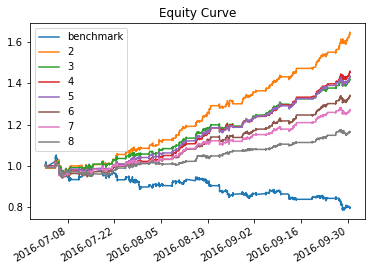

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.226242              0.007724                -0.002688   
1               0.209923              0.005456                -0.002719   
2               0.226059              0.005866                -0.002975   
3               0.218905              0.005670                -0.002877   
4               0.241381              0.004620                -0.002968   
5               0.235376              0.003784                -0.002821   
6               0.243174              0.002432                -0.002551   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001809                  0.000193             -0.032218   
1                 0.001776                  0.000134             -0.032218   
2                 0.001735                  0.000156             -0.032218   
3                 0.001762                  0.000160             -0.028191   
4        

In [10]:
#max_order=7 is actually max order 8
slm_th = SLM(slm, 0.4, th_type=1).run()

lm_validation = LmValidation(slm_th, symbol='bu_major', data_dir=r'/Users/Shufang/Documents/Qishi_QR/Output',
                                 valid_dir=r'/Users/Shufang/Documents/Qishi_QR/Validation', 
                             max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Shufang/Documents/Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


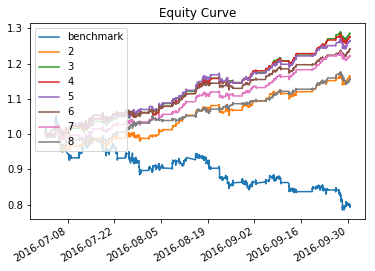

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.187423              0.002369                -0.002851   
1               0.153470              0.003938                -0.002906   
2               0.147828              0.003819                -0.002930   
3               0.158067              0.003670                -0.002826   
4               0.149485              0.003380                -0.002642   
5               0.159011              0.003152                -0.002647   
6               0.213408              0.002302                -0.002486   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001807                  0.000079             -0.032218   
1                 0.001833                  0.000148             -0.027142   
2                 0.001820                  0.000148             -0.027142   
3                 0.001818                  0.000128             -0.027520   
4        

In [11]:
#max_order=7 is actually max order 8
slm_th = SLM(slm, 0.45, th_type=1).run()

lm_validation = LmValidation(slm_th, symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Shufang/Documents/Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


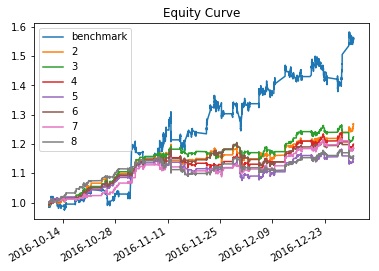

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.208929              0.004052                -0.003584   
1               0.226445              0.003468                -0.003941   
2               0.232993              0.003112                -0.004053   
3               0.233463              0.002407                -0.003990   
4               0.220939              0.002911                -0.003503   
5               0.235637              0.002943                -0.003391   
6               0.272579              0.002532                -0.003246   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002241                  0.000136             -0.037236   
1                 0.002244                  0.000125             -0.035831   
2                 0.002232                  0.000112             -0.038965   
3                 0.002185                  0.000076             -0.036129   
4        

In [12]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Dechang/QishiQR/Backtesting/Vectorized/backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


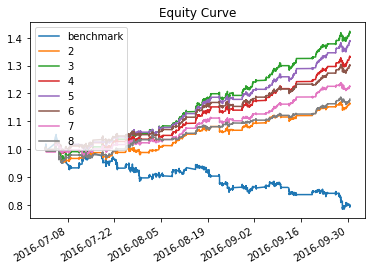

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.187423              0.002369                -0.002851   
1               0.209923              0.005456                -0.002719   
2               0.186390              0.004469                -0.002908   
3               0.184886              0.005135                -0.002858   
4               0.175861              0.004118                -0.002636   
5               0.182191              0.003180                -0.002580   
6               0.209716              0.002594                -0.002485   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001807                  0.000079             -0.032218   
1                 0.001776                  0.000134             -0.032218   
2                 0.001744                  0.000120             -0.027520   
3                 0.001759                  0.000144             -0.029324   
4        

In [172]:
#max_order=7 is actually max order 8
slm_th = SLM(slm, 0.1, th_type=2).run()

lm_validation = LmValidation(slm_th, symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Dechang/QishiQR/Backtesting/Vectorized/backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


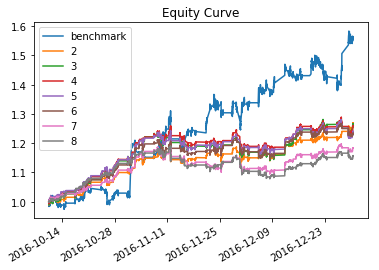

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.208929              0.004052                -0.003584   
1               0.274730              0.004028                -0.003742   
2               0.254832              0.003957                -0.003945   
3               0.257368              0.003692                -0.004017   
4               0.263596              0.003605                -0.003560   
5               0.252725              0.002889                -0.003385   
6               0.275261              0.002496                -0.003299   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002241                  0.000136             -0.037236   
1                 0.002176                  0.000098             -0.040213   
2                 0.002179                  0.000105             -0.040143   
3                 0.002168                  0.000102             -0.037517   
4        

In [173]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Dechang/QishiQR/Backtesting/Vectorized/backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


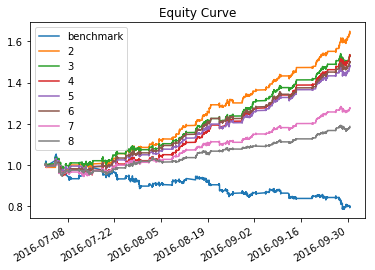

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.226242              0.007724                -0.002688   
1               0.221148              0.006649                -0.002810   
2               0.237367              0.006665                -0.002892   
3               0.228829              0.006166                -0.002918   
4               0.228015              0.006373                -0.002904   
5               0.234872              0.003837                -0.002687   
6               0.241037              0.002693                -0.002528   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001809                  0.000193             -0.032218   
1                 0.001745                  0.000189             -0.032218   
2                 0.001720                  0.000191             -0.032218   
3                 0.001748                  0.000179             -0.028191   
4        

In [168]:
#max_order=7 is actually max order 8
slm_th = SLM(slm, 0.05, th_type=2).run()

lm_validation = LmValidation(slm_th, symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Dechang/QishiQR/Backtesting/Vectorized/backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


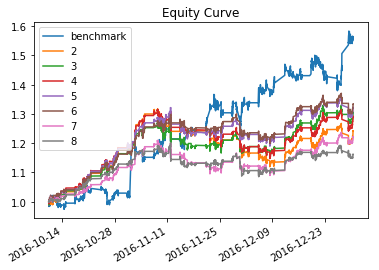

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.339514              0.003701                -0.003730   
1               0.298476              0.004533                -0.003884   
2               0.323167              0.004369                -0.003933   
3               0.296565              0.004770                -0.004012   
4               0.304550              0.004924                -0.004007   
5               0.301941              0.003427                -0.003598   
6               0.326596              0.002588                -0.003402   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002171                  0.000095             -0.042088   
1                 0.002120                  0.000126             -0.043798   
2                 0.002126                  0.000124             -0.044408   
3                 0.002180                  0.000136             -0.044219   
4        

In [169]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Dechang/QishiQR/Backtesting/Vectorized/backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


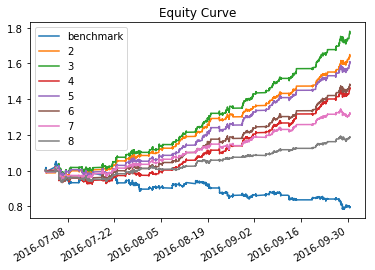

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.226242              0.007724                -0.002688   
1               0.234234              0.008917                -0.002803   
2               0.265805              0.005949                -0.003218   
3               0.251689              0.007442                -0.002906   
4               0.271105              0.006182                -0.003027   
5               0.259809              0.004392                -0.002887   
6               0.261254              0.002717                -0.002615   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001809                  0.000193             -0.032218   
1                 0.001777                  0.000300             -0.032218   
2                 0.001755                  0.000250             -0.027434   
3                 0.001756                  0.000264             -0.028542   
4        

In [166]:
#max_order=7 is actually max order 8
slm_th = SLM(slm, 0.05, th_type=3).run()

lm_validation = LmValidation(slm_th, symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Dechang/QishiQR/Backtesting/Vectorized/backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


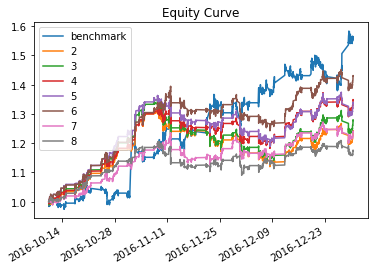

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.339514              0.003701                -0.003730   
1               0.362775              0.004207                -0.003912   
2               0.344218              0.005105                -0.004238   
3               0.349472              0.004987                -0.004011   
4               0.346662              0.006106                -0.004131   
5               0.337506              0.003694                -0.004035   
6               0.352551              0.002779                -0.003535   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002171                  0.000095             -0.042088   
1                 0.002125                  0.000141             -0.045502   
2                 0.002202                  0.000208             -0.048069   
3                 0.002126                  0.000176             -0.048069   
4        

In [167]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()